In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
credit = pd.read_csv('BancoUno.csv')
credit.shape

(30000, 25)

In [3]:
credit[['MARRIAGE']] = credit[['MARRIAGE',]].astype('object')
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          30000 non-null  int64 
 1   LIMIT_BAL                   30000 non-null  int64 
 2   SEX                         30000 non-null  object
 3   EDUCATION                   30000 non-null  object
 4   MARRIAGE                    30000 non-null  object
 5   AGE                         30000 non-null  int64 
 6   PAY_0                       30000 non-null  int64 
 7   PAY_2                       30000 non-null  int64 
 8   PAY_3                       30000 non-null  int64 
 9   PAY_4                       30000 non-null  int64 
 10  PAY_5                       30000 non-null  int64 
 11  PAY_6                       30000 non-null  int64 
 12  BILL_AMT1                   30000 non-null  int64 
 13  BILL_AMT2                   30000 non-null  in

In [4]:
credit = credit.drop_duplicates()
credit = credit.drop(columns = ['ID'])
credit.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,female,university,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,default
1,120000,female,university,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,default
2,90000,female,university,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,not default
3,50000,female,university,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,not default
4,50000,male,university,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,not default


In [5]:
credit[['LIMIT_BAL', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']] = credit[['LIMIT_BAL', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].astype('float')
credit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   LIMIT_BAL                   30000 non-null  float64
 1   SEX                         30000 non-null  object 
 2   EDUCATION                   30000 non-null  object 
 3   MARRIAGE                    30000 non-null  object 
 4   AGE                         30000 non-null  float64
 5   PAY_0                       30000 non-null  float64
 6   PAY_2                       30000 non-null  float64
 7   PAY_3                       30000 non-null  float64
 8   PAY_4                       30000 non-null  float64
 9   PAY_5                       30000 non-null  float64
 10  PAY_6                       30000 non-null  float64
 11  BILL_AMT1                   30000 non-null  float64
 12  BILL_AMT2                   30000 non-null  float64
 13  BILL_AMT3                   300

In [6]:
credit_df_dummies = pd.get_dummies(credit, columns = ['SEX', 'EDUCATION', 'MARRIAGE', 'default payment next month'])
credit_df_dummies

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_other,EDUCATION_university,MARRIAGE_0,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,default payment next month_default,default payment next month_not default
0,20000.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,-2.0,3913.0,3102.0,...,0,0,0,1,0,1,0,0,1,0
1,120000.0,26.0,-1.0,2.0,0.0,0.0,0.0,2.0,2682.0,1725.0,...,0,0,0,1,0,0,1,0,1,0
2,90000.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,29239.0,14027.0,...,0,0,0,1,0,0,1,0,0,1
3,50000.0,37.0,0.0,0.0,0.0,0.0,0.0,0.0,46990.0,48233.0,...,0,0,0,1,0,1,0,0,0,1
4,50000.0,57.0,-1.0,0.0,-1.0,0.0,0.0,0.0,8617.0,5670.0,...,0,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,188948.0,192815.0,...,0,1,0,0,0,1,0,0,0,1
29996,150000.0,43.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,1683.0,1828.0,...,0,1,0,0,0,0,1,0,0,1
29997,30000.0,37.0,4.0,3.0,2.0,-1.0,0.0,0.0,3565.0,3356.0,...,0,0,0,1,0,0,1,0,1,0
29998,80000.0,41.0,1.0,-1.0,0.0,0.0,0.0,-1.0,-1645.0,78379.0,...,0,1,0,0,0,1,0,0,1,0


In [7]:
print('----------------------')
print('Media de cada variable')
print('----------------------')
credit_df_dummies.mean(axis=0)

----------------------
Media de cada variable
----------------------


LIMIT_BAL                                 167484.322667
AGE                                           35.485500
PAY_0                                         -0.016700
PAY_2                                         -0.133767
PAY_3                                         -0.166200
PAY_4                                         -0.220667
PAY_5                                         -0.266200
PAY_6                                         -0.291100
BILL_AMT1                                  51223.330900
BILL_AMT2                                  49179.075167
BILL_AMT3                                  47013.154800
BILL_AMT4                                  43262.948967
BILL_AMT5                                  40311.400967
BILL_AMT6                                  38871.760400
PAY_AMT1                                    5663.580500
PAY_AMT2                                    5921.163500
PAY_AMT3                                    5225.681500
PAY_AMT4                                    4826

In [8]:
print('-------------------------')
print('Varianza de cada variable')
print('-------------------------')
credit_df_dummies.var(axis=0)

-------------------------
Varianza de cada variable
-------------------------


LIMIT_BAL                                 1.683446e+10
AGE                                       8.496976e+01
PAY_0                                     1.262930e+00
PAY_2                                     1.433254e+00
PAY_3                                     1.432492e+00
PAY_4                                     1.366885e+00
PAY_5                                     1.284114e+00
PAY_6                                     1.322472e+00
BILL_AMT1                                 5.422240e+09
BILL_AMT2                                 5.065705e+09
BILL_AMT3                                 4.809338e+09
BILL_AMT4                                 4.138716e+09
BILL_AMT5                                 3.696294e+09
BILL_AMT6                                 3.546692e+09
PAY_AMT1                                  2.743423e+08
PAY_AMT2                                  5.308817e+08
PAY_AMT3                                  3.100051e+08
PAY_AMT4                                  2.454286e+08
PAY_AMT5  

In [9]:
credit_df_dummies.head()

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_other,EDUCATION_university,MARRIAGE_0,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,default payment next month_default,default payment next month_not default
0,20000.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,-2.0,3913.0,3102.0,...,0,0,0,1,0,1,0,0,1,0
1,120000.0,26.0,-1.0,2.0,0.0,0.0,0.0,2.0,2682.0,1725.0,...,0,0,0,1,0,0,1,0,1,0
2,90000.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,29239.0,14027.0,...,0,0,0,1,0,0,1,0,0,1
3,50000.0,37.0,0.0,0.0,0.0,0.0,0.0,0.0,46990.0,48233.0,...,0,0,0,1,0,1,0,0,0,1
4,50000.0,57.0,-1.0,0.0,-1.0,0.0,0.0,0.0,8617.0,5670.0,...,0,0,0,1,0,1,0,0,0,1


In [10]:
credit_df_dummies.columns

Index(['LIMIT_BAL', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
       'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'SEX_female', 'SEX_male',
       'EDUCATION_graduate school', 'EDUCATION_high school', 'EDUCATION_other',
       'EDUCATION_university', 'MARRIAGE_0', 'MARRIAGE_1', 'MARRIAGE_2',
       'MARRIAGE_3', 'default payment next month_default',
       'default payment next month_not default'],
      dtype='object')

In [11]:
datos = credit_df_dummies [['LIMIT_BAL', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'SEX_female', 'SEX_male',
       'EDUCATION_graduate school', 'EDUCATION_high school', 'EDUCATION_other',
       'EDUCATION_university', 'MARRIAGE_0', 'MARRIAGE_1', 'MARRIAGE_2',
       'MARRIAGE_3', 'default payment next month_default',
       'default payment next month_not default']].copy()
datos.head()

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,BILL_AMT1,BILL_AMT2,BILL_AMT3,PAY_AMT1,PAY_AMT2,...,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_other,EDUCATION_university,MARRIAGE_0,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,default payment next month_default,default payment next month_not default
0,20000.0,24.0,2.0,2.0,-1.0,3913.0,3102.0,689.0,0.0,689.0,...,0,0,0,1,0,1,0,0,1,0
1,120000.0,26.0,-1.0,2.0,0.0,2682.0,1725.0,2682.0,0.0,1000.0,...,0,0,0,1,0,0,1,0,1,0
2,90000.0,34.0,0.0,0.0,0.0,29239.0,14027.0,13559.0,1518.0,1500.0,...,0,0,0,1,0,0,1,0,0,1
3,50000.0,37.0,0.0,0.0,0.0,46990.0,48233.0,49291.0,2000.0,2019.0,...,0,0,0,1,0,1,0,0,0,1
4,50000.0,57.0,-1.0,0.0,-1.0,8617.0,5670.0,35835.0,2000.0,36681.0,...,0,0,0,1,0,1,0,0,0,1


In [12]:
corr_df = datos.corr()
print("The correlation DataFrame is:")
print(corr_df, "\n")

The correlation DataFrame is:
                                        LIMIT_BAL       AGE     PAY_0  \
LIMIT_BAL                                1.000000  0.144713 -0.271214   
AGE                                      0.144713  1.000000 -0.039447   
PAY_0                                   -0.271214 -0.039447  1.000000   
PAY_2                                   -0.296382 -0.050148  0.672164   
PAY_3                                   -0.286123 -0.053048  0.574245   
BILL_AMT1                                0.285430  0.056239  0.187068   
BILL_AMT2                                0.278314  0.054283  0.189859   
BILL_AMT3                                0.283236  0.053710  0.179785   
PAY_AMT1                                 0.195236  0.026147 -0.079269   
PAY_AMT2                                 0.178408  0.021785 -0.070101   
PAY_AMT3                                 0.210167  0.029247 -0.070561   
SEX_female                               0.024755 -0.090874 -0.057643   
SEX_male             

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
small_df = datos [['LIMIT_BAL', 'AGE', 'PAY_0', 'BILL_AMT1', 'PAY_AMT1', 'SEX_female', 'SEX_male',
       'EDUCATION_graduate school', 'EDUCATION_high school', 'EDUCATION_other',
       'EDUCATION_university', 'MARRIAGE_0', 'MARRIAGE_1', 'MARRIAGE_2',
       'MARRIAGE_3', 'default payment next month_default',
       'default payment next month_not default']].copy()
small_df1 = small_df.loc[:1500, :]
small_df1.tail()

,LIMIT_BAL,AGE,PAY_0,BILL_AMT1,PAY_AMT1,SEX_female,SEX_male,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_other,EDUCATION_university,MARRIAGE_0,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,default payment next month_default,default payment next month_not default
1496,360000.0,35.0,2.0,360023.0,14693.0,1,0,0,0,0,1,0,0,1,0,1,0
1497,130000.0,34.0,0.0,59955.0,2260.0,1,0,0,0,0,1,0,1,0,0,0,1
1498,180000.0,48.0,1.0,2551.0,3044.0,1,0,0,0,0,1,0,0,1,0,0,1
1499,20000.0,27.0,1.0,6274.0,0.0,0,1,1,0,0,0,0,0,1,0,0,1
1500,230000.0,43.0,0.0,7806.0,1295.0,1,0,0,0,0,1,0,1,0,0,0,1


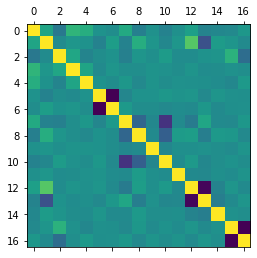

In [15]:
corr_df = small_df1.corr(method='pearson')

plt.matshow(corr_df)
plt.show()

In [16]:
import seaborn as sns

In [17]:
matrix = credit_df_dummies.corr()

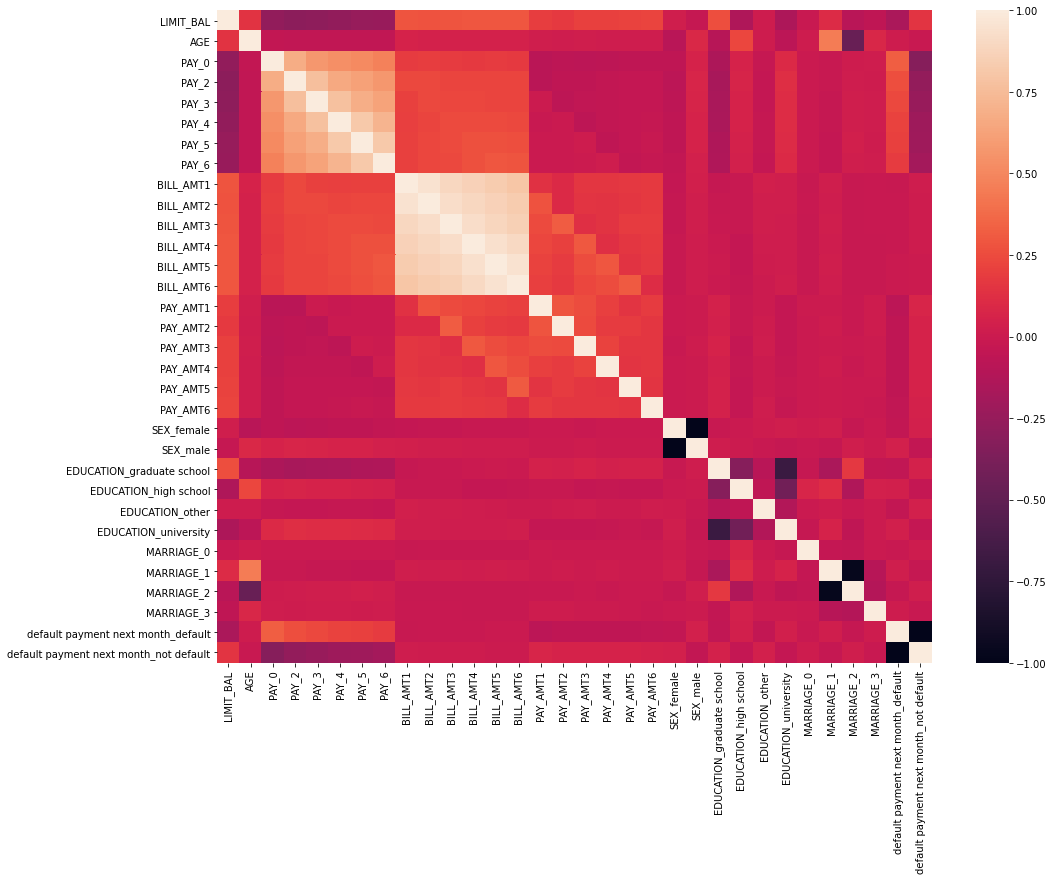

In [29]:
plt.figure(figsize=(16,12))
_ = sns.heatmap(matrix)

In [19]:
credit_df_dummies.head()

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_other,EDUCATION_university,MARRIAGE_0,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,default payment next month_default,default payment next month_not default
0,20000.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,-2.0,3913.0,3102.0,...,0,0,0,1,0,1,0,0,1,0
1,120000.0,26.0,-1.0,2.0,0.0,0.0,0.0,2.0,2682.0,1725.0,...,0,0,0,1,0,0,1,0,1,0
2,90000.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,29239.0,14027.0,...,0,0,0,1,0,0,1,0,0,1
3,50000.0,37.0,0.0,0.0,0.0,0.0,0.0,0.0,46990.0,48233.0,...,0,0,0,1,0,1,0,0,0,1
4,50000.0,57.0,-1.0,0.0,-1.0,0.0,0.0,0.0,8617.0,5670.0,...,0,0,0,1,0,1,0,0,0,1


In [20]:
credit_df_dummies.shape

(30000, 32)

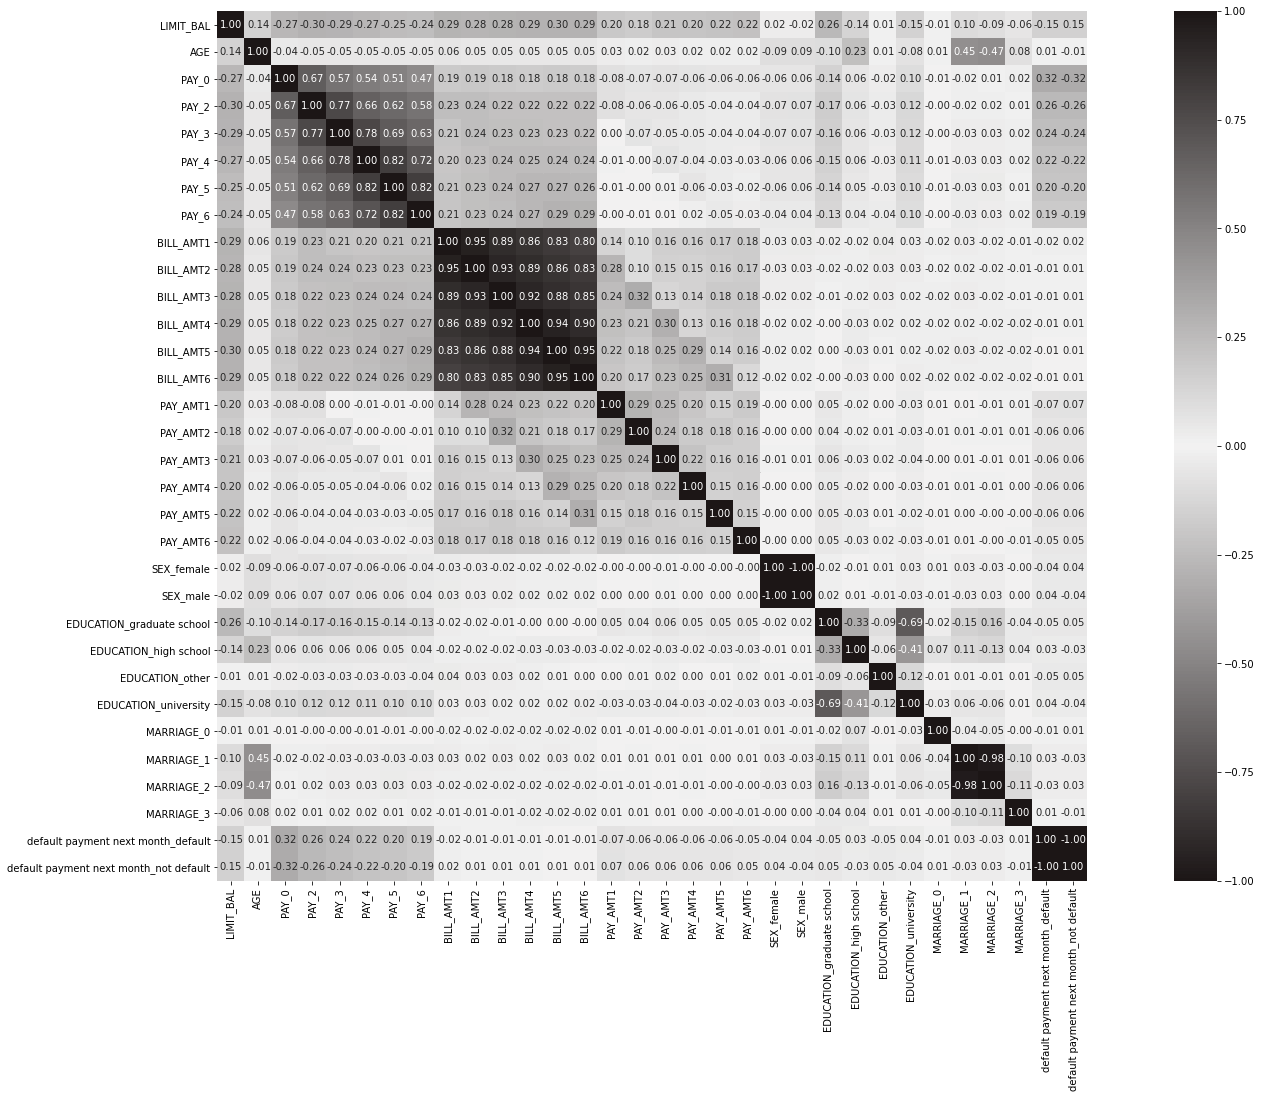

In [37]:
plt.figure(figsize=(31,16))
_ = sns.heatmap(matrix, center=0, annot=True, 
                fmt='.2f', square=True, cmap=cmap)

In [38]:
credit_df_dummies.columns

Index(['LIMIT_BAL', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
       'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'SEX_female', 'SEX_male',
       'EDUCATION_graduate school', 'EDUCATION_high school', 'EDUCATION_other',
       'EDUCATION_university', 'MARRIAGE_0', 'MARRIAGE_1', 'MARRIAGE_2',
       'MARRIAGE_3', 'default payment next month_default',
       'default payment next month_not default'],
      dtype='object')

In [40]:
credit_model = credit_df_dummies [['LIMIT_BAL', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
       'PAY_6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'SEX_female', 'SEX_male',
       'EDUCATION_graduate school', 'EDUCATION_high school', 'EDUCATION_other',
       'EDUCATION_university', 'MARRIAGE_0', 'MARRIAGE_1', 'MARRIAGE_2',
       'MARRIAGE_3', 'default payment next month_default',
       'default payment next month_not default']].copy()
credit_model.head()

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,PAY_AMT1,PAY_AMT2,...,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_other,EDUCATION_university,MARRIAGE_0,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,default payment next month_default,default payment next month_not default
0,20000.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,-2.0,0.0,689.0,...,0,0,0,1,0,1,0,0,1,0
1,120000.0,26.0,-1.0,2.0,0.0,0.0,0.0,2.0,0.0,1000.0,...,0,0,0,1,0,0,1,0,1,0
2,90000.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,1518.0,1500.0,...,0,0,0,1,0,0,1,0,0,1
3,50000.0,37.0,0.0,0.0,0.0,0.0,0.0,0.0,2000.0,2019.0,...,0,0,0,1,0,1,0,0,0,1
4,50000.0,57.0,-1.0,0.0,-1.0,0.0,0.0,0.0,2000.0,36681.0,...,0,0,0,1,0,1,0,0,0,1


In [45]:
credit_model.shape

(30000, 26)

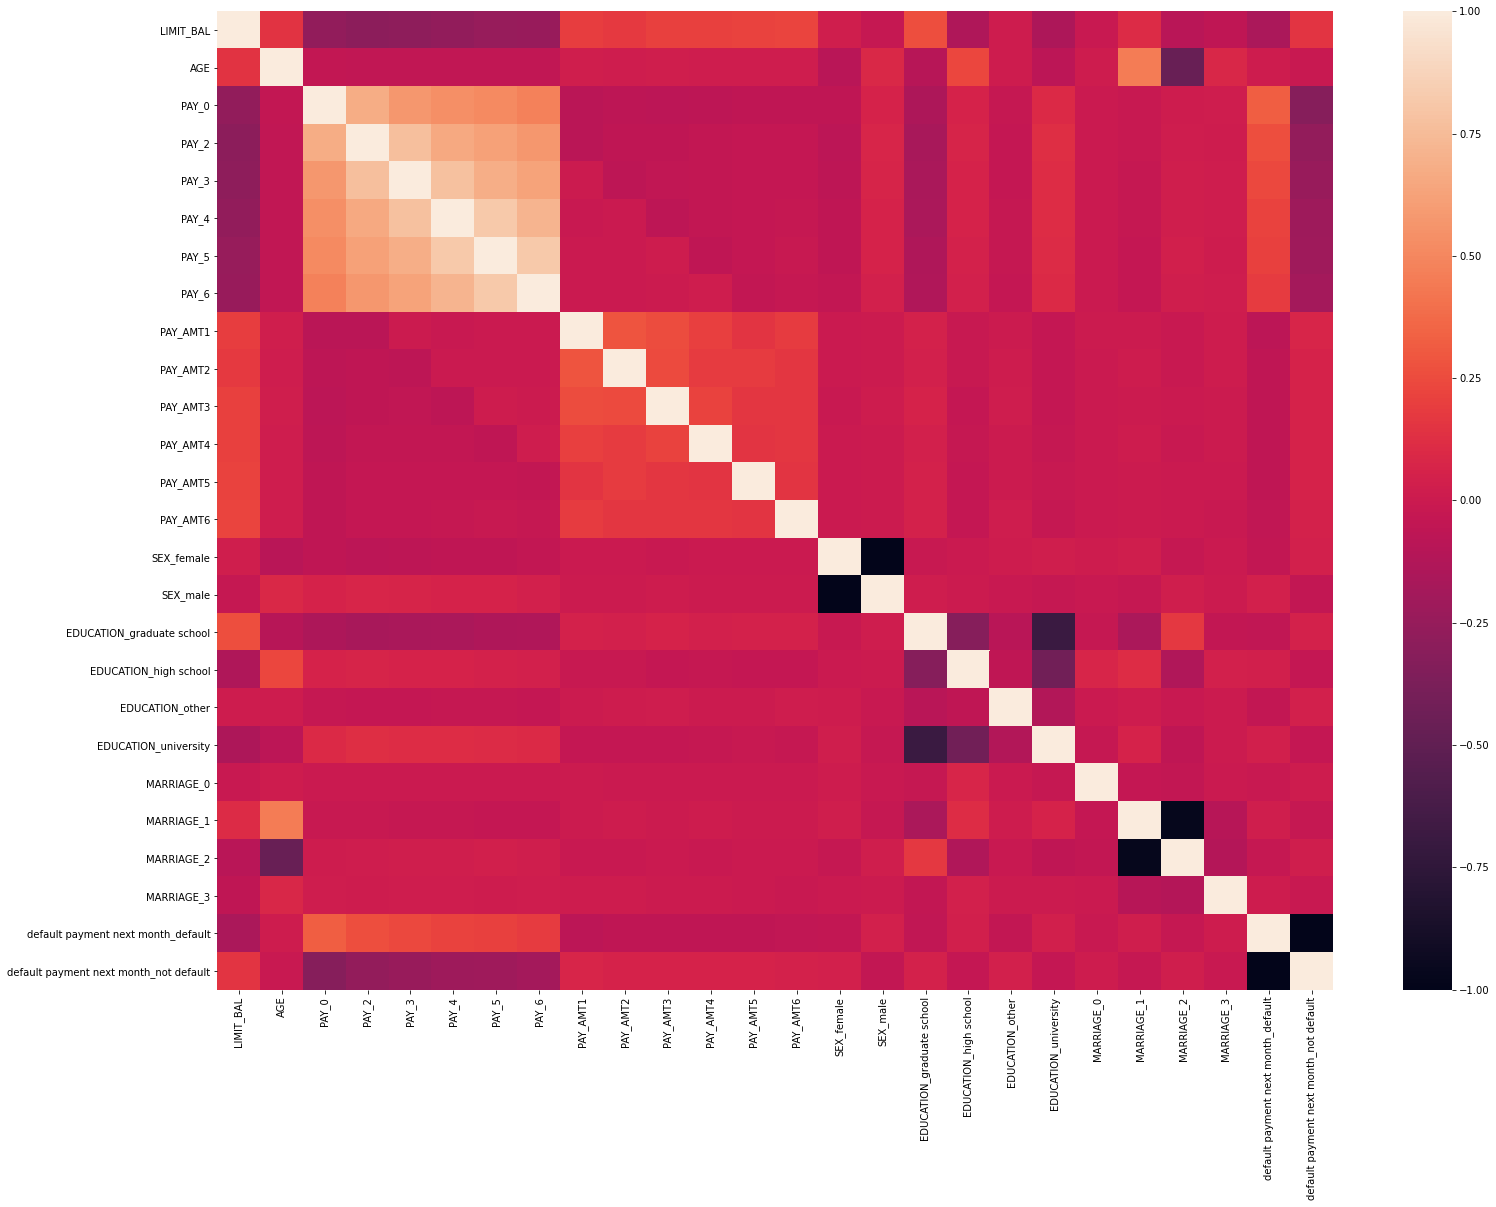

In [49]:
matrix = credit_model.corr()
plt.figure(figsize=(25,18))
_ = sns.heatmap(matrix)

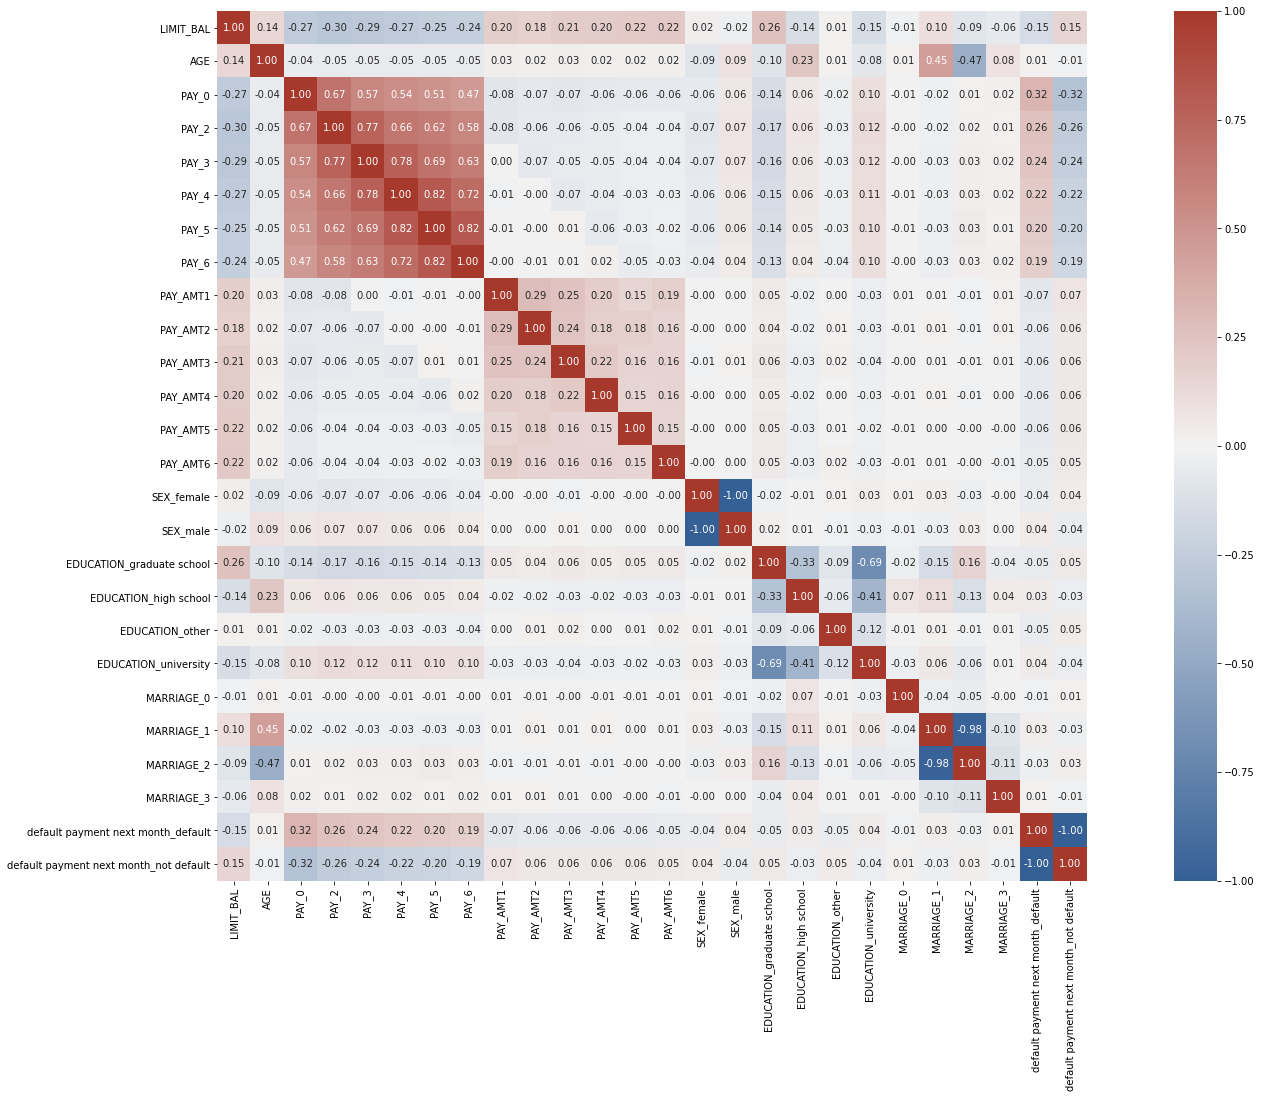

In [53]:
matrix1 = credit_model.corr()
plt.figure(figsize=(31,16))
cmap = sns.diverging_palette(250, 15, s=75, l=40,
                             n=9, center="light", as_cmap=True)
_ = sns.heatmap(matrix1, center=0, annot=True, 
                fmt='.2f', square=True, cmap=cmap)

In [58]:
credit_model1 = credit_model [['LIMIT_BAL', 'AGE', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'EDUCATION_graduate school', 'EDUCATION_high school', 'EDUCATION_other',
       'EDUCATION_university', 'default payment next month_default',
       'default payment next month_not default']].copy()
credit_model1.head()

,LIMIT_BAL,AGE,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_other,EDUCATION_university,default payment next month_default,default payment next month_not default
0,20000.0,24.0,0.0,689.0,0.0,0.0,0.0,0.0,0,0,0,1,1,0
1,120000.0,26.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,0,0,0,1,1,0
2,90000.0,34.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,0,0,1,0,1
3,50000.0,37.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,0,0,1,0,1
4,50000.0,57.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,0,0,1,0,1


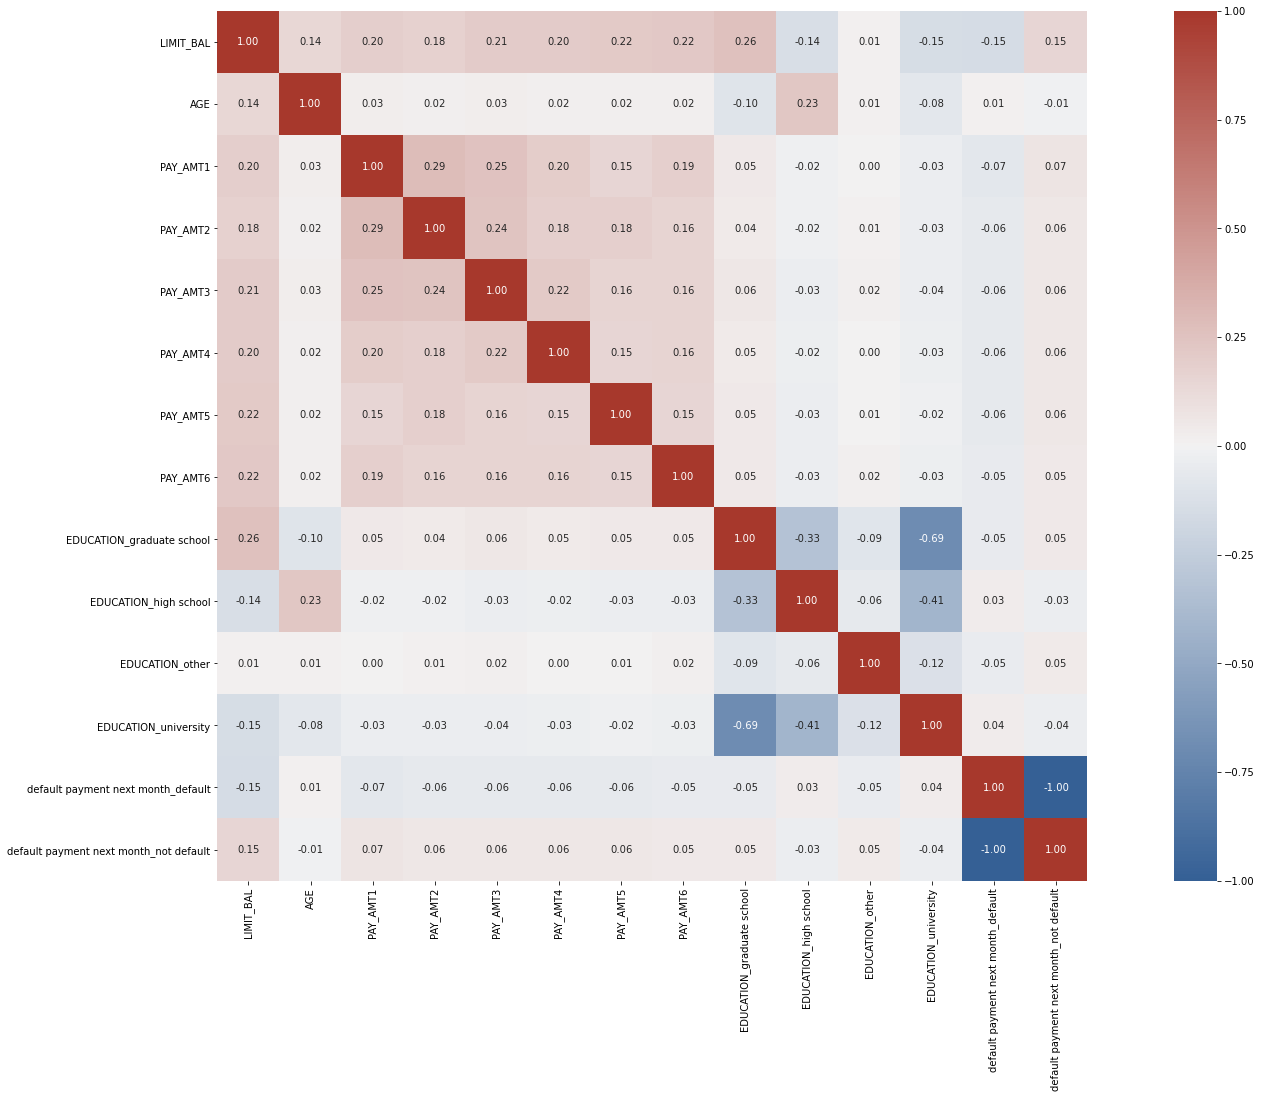

In [62]:
matrix2 = credit_model1.corr()
plt.figure(figsize=(31,16))
cmap = sns.diverging_palette(250, 15, s=75, l=40,
                             n=9, center="light", as_cmap=True)
_ = sns.heatmap(matrix2, center=0, annot=True, 
                fmt='.2f', square=True, cmap=cmap)

In [63]:
credit_model1.to_csv("clencredit_noind.csv", index=False )